In [1]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
os.listdir()

['.ipynb_checkpoints',
 'Comcast_telecom_complaints_data.csv',
 'Comcast_telecom_complaints_data.ipynb']

In [2]:
# read data set
df_comcast = pd.read_csv('Comcast_telecom_complaints_data.csv')

In [3]:
df_comcast.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [4]:
df_comcast.shape

(2224, 11)

In [5]:
df_comcast.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [6]:
df_comcast.describe()

,Zip code
count,2224.000000
mean,47994.393435
std,28885.279427
min,1075.000000
25%,30056.500000
50%,37211.000000
75%,77058.750000
max,99223.000000


In [7]:
#check missing value
df_comcast.isnull().sum().sort_values(ascending=True)

Ticket #                       0
Customer Complaint             0
Date                           0
Date_month_year                0
Time                           0
Received Via                   0
City                           0
State                          0
Zip code                       0
Status                         0
Filing on Behalf of Someone    0
dtype: int64

### 2.Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [8]:
df_comcast.dtypes

Ticket #                       object
Customer Complaint             object
Date                           object
Date_month_year                object
Time                           object
Received Via                   object
City                           object
State                          object
Zip code                        int64
Status                         object
Filing on Behalf of Someone    object
dtype: object

In [9]:
# Add Date Month year with Time and save it into Date_Full
df_comcast['Date_full'] = df_comcast['Date_month_year']+ ' ' +df_comcast['Time']

In [10]:
df_comcast['Date_full']

0        22-Apr-15 3:53:50 PM
1       04-Aug-15 10:22:56 AM
2        18-Apr-15 9:55:47 AM
3       05-Jul-15 11:59:35 AM
4        26-May-15 1:25:26 PM
                ...          
2219     04-Feb-15 9:13:18 AM
2220     06-Feb-15 1:24:39 PM
2221     06-Sep-15 5:28:41 PM
2222    23-Jun-15 11:13:30 PM
2223    24-Jun-15 10:28:33 PM
Name: Date_full, Length: 2224, dtype: object

In [11]:
#covert datetime format
df_comcast['Date_full'] = pd.to_datetime(df_comcast['Date_full'])
df_comcast['Date_month_year'] = pd.to_datetime(df_comcast['Date_month_year'])
comcast_tele_consumer_monthly = df_comcast.set_index(df_comcast["Date_full"])

<AxesSubplot:xlabel='Date_full', ylabel='Number of company'>

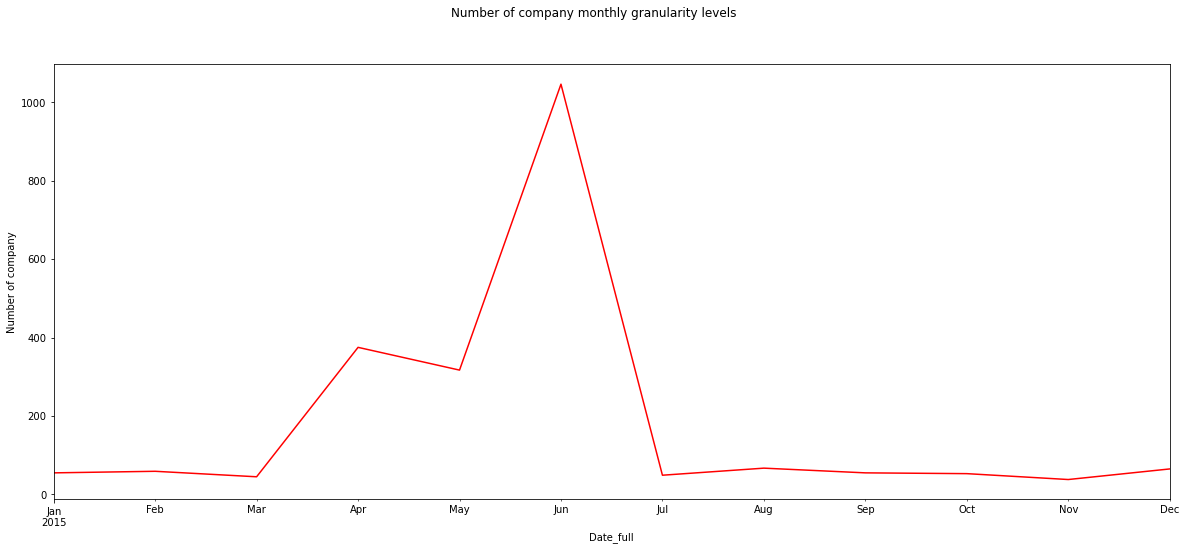

In [12]:
# Provide the trend chart for the number of complaints at monthly granularity levels.
#Increase Graph Size
plt.figure(figsize=(20,8))
plt.suptitle("Number of company monthly granularity levels")
plt.ylabel('Number of company')
comcast_tele_consumer_monthly.groupby(pd.Grouper(freq="M")).size().plot(color='red')

<AxesSubplot:xlabel='Date of Month', ylabel='Number of Company'>

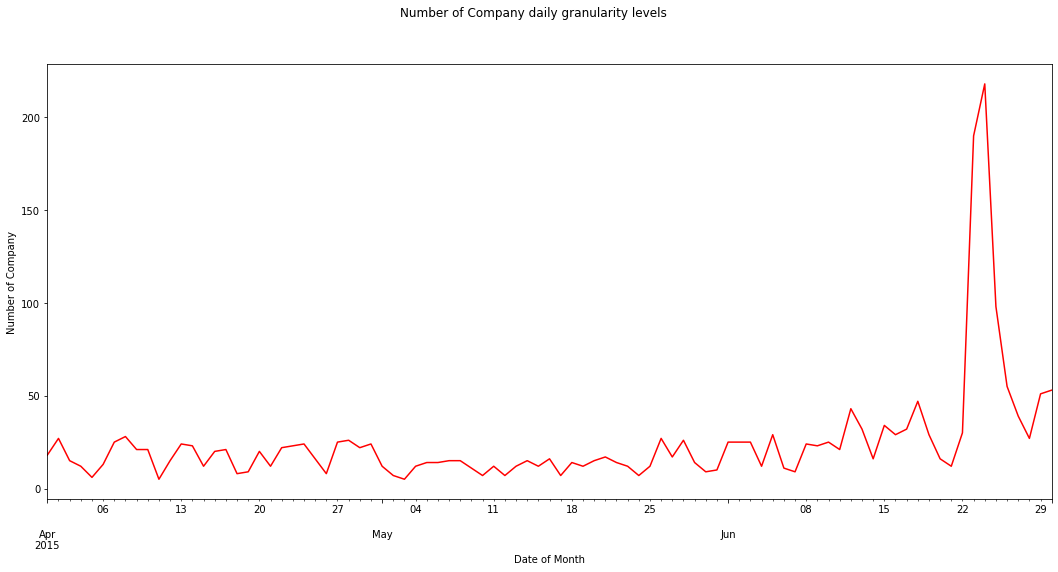

In [13]:
# Provide the trend chart for the number of complaints at daily granularity levels.
df_comcast['Date of Month'] = pd.to_datetime(df_comcast['Date'])
comcast_tele_consumer_daily = df_comcast.set_index(df_comcast['Date of Month'])
# plot 
plt.figure(figsize=(18,8))
plt.suptitle("Number of Company daily granularity levels")
plt.ylabel("Number of Company")
comcast_tele_consumer_daily.groupby(pd.Grouper(freq = "D")).size().plot(color='red')

#### 3. Provide a table with the frequency of complaint types.

In [14]:
# To get the frequency of complaint types first we have to see all complaint types and check for duplicate, case sensentive
# Incomplete data so that we can make analytics better
df_comcast_complain_type = df_comcast['Customer Complaint'].value_counts()
df_comcast_complain_type.head(10)

Comcast                     83
Comcast Internet            18
Comcast Data Cap            17
comcast                     13
Comcast Billing             11
Data Caps                   11
Comcast Data Caps           11
Unfair Billing Practices     9
Comcast data cap             8
Comcast internet             8
Name: Customer Complaint, dtype: int64

In [15]:
# Better to convert all data into uper case or sentence case so duplicate value will shorted
df_comcast_complain_type_upper = df_comcast['Customer Complaint'].str.upper().value_counts()
df_comcast_complain_type_upper.head(25)

COMCAST                             102
COMCAST DATA CAP                     30
COMCAST INTERNET                     29
COMCAST DATA CAPS                    21
COMCAST BILLING                      18
COMCAST SERVICE                      15
INTERNET SPEED                       15
UNFAIR BILLING PRACTICES             13
DATA CAPS                            13
DATA CAP                             12
COMCAST COMPLAINT                    11
COMCAST/XFINITY                      11
COMCAST INTERNET SERVICE             10
BILLING                               9
BILLING ISSUES                        8
COMCAST CABLE                         5
INTERNET                              5
COMCAST BILLING COMPLAINT             5
COMCAST ISSUES                        5
COMCAST BILLING PRACTICES             5
SERVICE ISSUES                        5
SLOW INTERNET                         5
INTERNET SERVICE                      5
COMPLAINT AGAINST COMCAST             5
COMCAST UNFAIR BILLING PRACTICES      4


### 4.Create a new categorical variable with value as Open and Closed. 
### Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.

In [16]:
df_comcast['Status'].unique()

array(['Closed', 'Open', 'Solved', 'Pending'], dtype=object)

In [17]:
# Convert as per Instruction (Task 4) into New Column without changing the main data so that we can use the main data
# in Future
df_comcast['New Status'] = ["Open" if Status =='Open' or Status == 'Pending' else "Closed" for Status in df_comcast['Status']]

In [18]:
df_comcast['New Status'].unique()

array(['Closed', 'Open'], dtype=object)

In [19]:
df_comcast_state_by_status = pd.crosstab(df_comcast.State,df_comcast['New Status'])

In [20]:
df_comcast_state_by_status

New Status,Closed,Open
State,,
Alabama,17,9
Arizona,14,6
Arkansas,6,0
California,159,61
Colorado,58,22
Connecticut,9,3
Delaware,8,4
District Of Columbia,14,2
District of Columbia,1,0


<AxesSubplot:title={'center':'state wise Status Complaints'}, xlabel='State'>

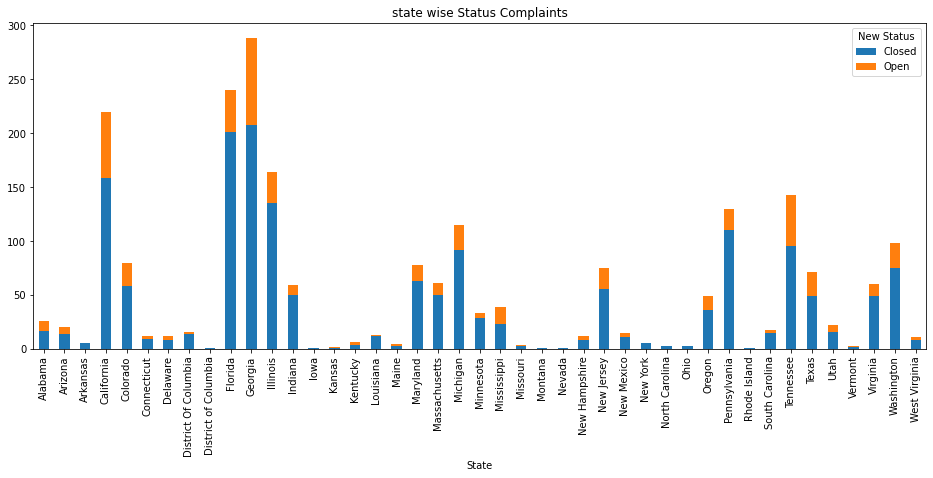

In [21]:
df_comcast_state_by_status.plot(kind = 'bar',figsize=(16,6),stacked=True,title="state wise Status Complaints")

### 5. Which state has the highest percentage of unresolved complaints

In [22]:
df_comcast_unsloved_complaint = df_comcast[df_comcast['New Status']=='Open']

In [23]:
df_comcast_unsloved_complaint_value_count=df_comcast_unsloved_complaint['State'].value_counts()
df_comcast_unsloved_complaint_value_count

Georgia                 80
California              61
Tennessee               47
Florida                 39
Illinois                29
Michigan                23
Washington              23
Texas                   22
Colorado                22
Pennsylvania            20
New Jersey              19
Mississippi             16
Maryland                15
Oregon                  13
Massachusetts           11
Virginia                11
Indiana                  9
Alabama                  9
Arizona                  6
Utah                     6
New Hampshire            4
Delaware                 4
Minnesota                4
New Mexico               4
Connecticut              3
West Virginia            3
South Carolina           3
Kentucky                 3
Maine                    2
District Of Columbia     2
Missouri                 1
Vermont                  1
Kansas                   1
Louisiana                1
Name: State, dtype: int64

Text(0.5, 1.0, 'Highest percentage of unresolved complaints \n')

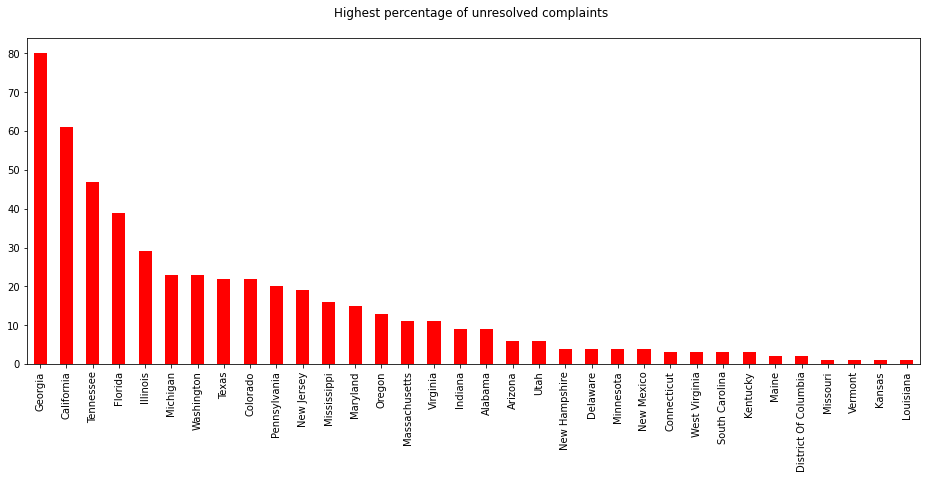

In [39]:
df_comcast_unsloved_complaint_value_count.plot(kind='bar',figsize=(16,6),color='red')
plt.title("Highest percentage of unresolved complaints \n")

### 9. Provide the percentage of complaints resolved till date, 
### which were received through the Internet and customer care calls.

In [25]:
df_comcast['Received Via'].unique()

array(['Customer Care Call', 'Internet'], dtype=object)

In [26]:
df_comcast['Received Via'].value_counts()

Customer Care Call    1119
Internet              1105
Name: Received Via, dtype: int64

In [27]:
df_comcast['Received Via'].value_counts()/df_comcast['Received Via'].count()

Customer Care Call    0.503147
Internet              0.496853
Name: Received Via, dtype: float64

In [33]:
value = df_comcast['New Status'][df_comcast['Received Via']=='Internet'].value_counts()

In [34]:
value

Closed    843
Open      262
Name: New Status, dtype: int64

<AxesSubplot:title={'center':'Complaints Status through the Internet & Customer Care Calls\n'}, ylabel='New Status'>

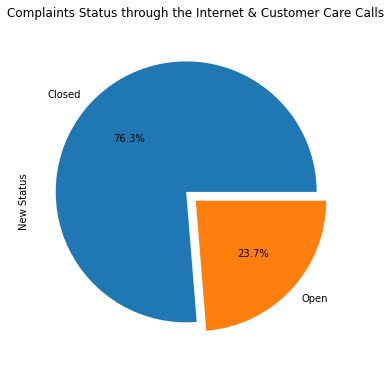

In [37]:
myexplode = [0.1, 0]
plt.title('Complaints Status through the Internet & Customer Care Calls\n')
df_comcast['New Status'][df_comcast['Received Via']=='Internet'].value_counts().plot(kind='pie',explode = myexplode,autopct='%1.1f%%',
                        figsize = (14,6))